In [2]:
import pandas as pd
import sklearn
import yaml
import joblib
import pytest
from Bio import SeqIO
import umap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
with open("config.yaml", "r") as f:
    config = yaml.safe_load(f)

In [4]:
sequences = []
cluster_ids = []
for record in SeqIO.parse("data/uniref50_sample_2.fasta", "fasta"):
    header_parts = record.description.split(" ")
    cluster_id = header_parts[0]
    sequences.append(str(record.seq))
    cluster_ids.append(cluster_id)

In [5]:
data = {"cluster_id": cluster_ids, "sequence": sequences}

In [6]:
amino_acids = list("ACDEFGHIKLMNPQRSTVWY")
encoded = []
for seq in data["sequence"]:
    vec = [seq.count(aa) / len(seq) for aa in amino_acids]
    encoded.append(vec)

In [7]:
preprocessed = np.array(encoded)

In [8]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, random_state=42)
model.fit(preprocessed)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [9]:
predictions = model.predict(preprocessed)

C:\Users\halam\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\halam\AppData\Roaming\Python\Python312\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


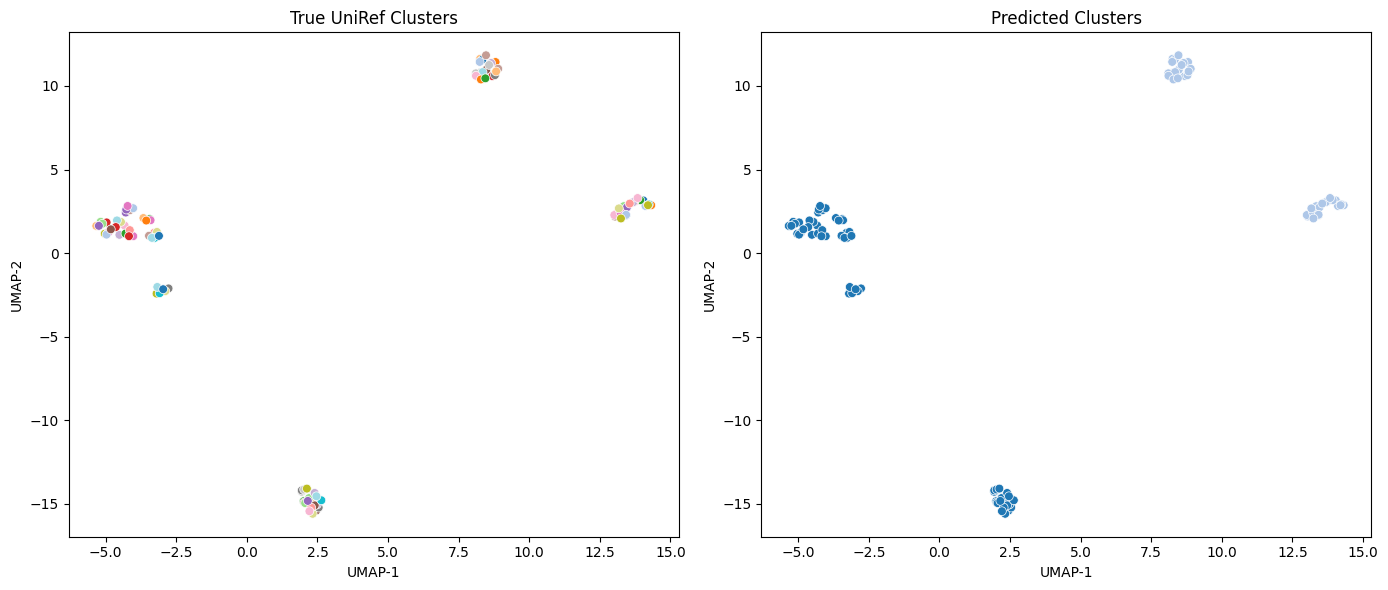

In [10]:
from sklearn.preprocessing import LabelEncoder

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(preprocessed)
le_true = LabelEncoder()
y_true = le_true.fit_transform(data['cluster_id'])
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for ax, labels, title in zip(axes, [y_true, predictions], ["True UniRef Clusters", "Predicted Clusters"]):
    scatter = sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=labels, palette='tab20', s=40, ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel("UMAP-1")
    ax.set_ylabel("UMAP-2")
plt.tight_layout()
plt.show()